In [1]:
import numpy as np

import seaborn as sb

import matplotlib.pyplot as plt

import pandas as pd
from pandas import Series, DataFrame

In [2]:
# Import studies text file
studies = pd.read_csv('C:/Users/akapoor/Music/01 Docs/HealthCare App/ctdb/studies.txt', sep="|")

C:\Users\akapoor\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (24,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
studies.head()

,nct_id,nlm_download_date_description,first_received_date,last_changed_date,first_received_results_date,received_results_disposit_date,start_month_year,start_date_type,start_date,verification_month_year,...,is_fda_regulated_device,is_unapproved_device,is_ppsd,is_us_export,biospec_retention,biospec_description,plan_to_share_ipd,plan_to_share_ipd_description,created_at,updated_at
0,NCT03303261,ClinicalTrials.gov processed this data on Octo...,2017-10-02,2017-10-02,NaN,NaN,"April 18, 2016",Actual,2016-04-18,October 2017,...,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-10 20:40:00.452499,2017-10-10 20:40:00.452499
1,NCT03292679,ClinicalTrials.gov processed this data on Octo...,2017-09-20,2017-09-20,NaN,NaN,October 2017,Anticipated,2017-10-01,September 2017,...,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-10 20:41:35.778202,2017-10-10 20:41:35.778202
2,NCT03296514,ClinicalTrials.gov processed this data on Octo...,2017-09-20,2017-09-27,NaN,NaN,"July 1, 2017",Actual,2017-07-01,September 2017,...,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-10 20:41:00.541701,2017-10-10 20:41:00.541701
3,NCT03128892,ClinicalTrials.gov processed this data on Octo...,2017-04-14,2017-04-20,NaN,NaN,"June 10, 2016",NaN,2016-06-10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-10 21:08:03.623608,2017-10-10 21:08:03.623608
4,NCT03304262,ClinicalTrials.gov processed this data on Octo...,2017-09-21,2017-10-02,NaN,NaN,"July 18, 2017",Actual,2017-07-18,October 2017,...,t,f,f,NaN,NaN,NaN,NaN,NaN,2017-10-10 20:39:52.031802,2017-10-10 20:39:52.031802


In [3]:
# Keep relevant columns only (23 columns of 49)
#studies_a=pd.DataFrame(studies,columns=['nct_id','overall_status'])

studies_a = pd.DataFrame(studies, columns=['why_stopped','verification_date','target_duration','study_type','start_date_type','start_date','source','phase','overall_status','official_title','number_of_arms','nct_id','limitations_and_caveats','last_known_status','last_changed_date','is_unapproved_device','is_fda_regulated_drug','is_fda_regulated_device','enrollment_type','enrollment','completion_date','brief_title','baseline_population'])



In [5]:
studies_a.nct_id.count()

258053

In [10]:
sponsors = pd.read_csv('C:/Users/akapoor/Music/01 Docs/HealthCare App/ctdb/sponsors.txt', sep="|")

sponsors.head()

,id,nct_id,agency_class,lead_or_collaborator,name
0,1785414,NCT03328455,Other,lead,"University of Nevada, Reno"
1,1785415,NCT03329326,Other,lead,Medical University of Vienna
2,1785416,NCT03329326,Other,collaborator,University Medical Center Goettingen
3,1785417,NCT03329326,Other,collaborator,Lund University
4,1785418,NCT03329326,Other,collaborator,"Örebro University, Sweden"


In [6]:
sponsors.nct_id.count()

405781

In [9]:
#*--------Merge Command to merge Studies and sponsors--------------------*
#studies_b=studies_a.join(sponsors,rsuffix='_other')

studies_b=studies_a.merge(sponsors,on='nct_id', how='left')

studies_b.head()

,why_stopped,verification_date,target_duration,study_type,start_date_type,start_date,source,phase,overall_status,official_title,...,is_fda_regulated_device,enrollment_type,enrollment,completion_date,brief_title,baseline_population,id,agency_class,lead_or_collaborator,name
0,NaN,2017-10-01,NaN,Observational,Actual,2016-04-18,Groupe Hospitalier Paris Saint Joseph,NaN,Recruiting,Study On Discopathie With Modic 1,...,f,Anticipated,50.0,2017-12-31,Study On Discopathie With Modic 1,NaN,1296282,Other,lead,Groupe Hospitalier Paris Saint Joseph
1,NaN,2017-09-01,NaN,Interventional,Anticipated,2017-10-01,University of Maryland,NaN,Not yet recruiting,Craniofacial Applications of 3D Printing,...,f,Anticipated,60.0,2019-09-01,Craniofacial Applications of 3D Printing,NaN,1297563,Other,lead,University of Maryland
2,NaN,2017-09-01,NaN,Interventional,Actual,2017-07-01,Yale University,NaN,Recruiting,Mindfulness-Based Stress Reduction Study for C...,...,f,Anticipated,40.0,2018-07-01,Mindfulness Based Stress Reduction for Metabol...,NaN,1297091,Other,lead,Yale University
3,NaN,NaN,NaN,NaN,NaN,2016-06-10,[Redacted],NaN,Withheld,[Trial of device that is not approved or clear...,...,NaN,NaN,NaN,NaN,[Trial of device that is not approved or clear...,NaN,1317902,Industry,lead,[Redacted]
4,NaN,2017-10-01,NaN,Interventional,Actual,2017-07-18,University of New Mexico,NaN,Recruiting,Metaplasticity in the Human Motor Cortex: Vali...,...,t,Anticipated,16.0,2018-03-31,Metaplasticity in the Human Motor Cortex Exper...,NaN,1296148,Other,lead,University of New Mexico


In [28]:
studies_b.nct_id.count()

258053

In [25]:

#-------IMport Countries-------#
countries = pd.read_csv('C:/Users/akapoor/Music/01 Docs/HealthCare App/ctdb/countries.txt', sep="|")

countries.head()

,id,nct_id,name,removed
0,1700677,NCT03308747,Greece,NaN
1,1700678,NCT03309722,United Kingdom,NaN
2,1700680,NCT03309696,United States,NaN
3,1700681,NCT03309670,France,NaN
4,1700686,NCT03309579,Canada,NaN


In [35]:
#*--------Merge Command to merge Studies and sponsors--------------------*
#studies_c=studies_b.merge(countries,on='nct_id')

studies_c = pd.merge(studies_b,countries[['nct_id','name']],on='nct_id', suffixes=('_sponsor', '_country'),how='left')

studies_c.head()

,why_stopped,verification_date,target_duration,study_type,start_date_type,start_date,source,phase,overall_status,official_title,...,enrollment_type,enrollment,completion_date,brief_title,baseline_population,id,agency_class,lead_or_collaborator,name_sponsor,name_country
0,NaN,2017-10-01,NaN,Observational,Actual,2016-04-18,Groupe Hospitalier Paris Saint Joseph,NaN,Recruiting,Study On Discopathie With Modic 1,...,Anticipated,50.0,2017-12-31,Study On Discopathie With Modic 1,NaN,1296282,Other,lead,Groupe Hospitalier Paris Saint Joseph,France
1,NaN,2017-09-01,NaN,Interventional,Anticipated,2017-10-01,University of Maryland,NaN,Not yet recruiting,Craniofacial Applications of 3D Printing,...,Anticipated,60.0,2019-09-01,Craniofacial Applications of 3D Printing,NaN,1297563,Other,lead,University of Maryland,NaN
2,NaN,2017-09-01,NaN,Interventional,Actual,2017-07-01,Yale University,NaN,Recruiting,Mindfulness-Based Stress Reduction Study for C...,...,Anticipated,40.0,2018-07-01,Mindfulness Based Stress Reduction for Metabol...,NaN,1297091,Other,lead,Yale University,United States
3,NaN,NaN,NaN,NaN,NaN,2016-06-10,[Redacted],NaN,Withheld,[Trial of device that is not approved or clear...,...,NaN,NaN,NaN,[Trial of device that is not approved or clear...,NaN,1317902,Industry,lead,[Redacted],NaN
4,NaN,2017-10-01,NaN,Interventional,Actual,2017-07-18,University of New Mexico,NaN,Recruiting,Metaplasticity in the Human Motor Cortex: Vali...,...,Anticipated,16.0,2018-03-31,Metaplasticity in the Human Motor Cortex Exper...,NaN,1296148,Other,lead,University of New Mexico,United States


In [11]:
#sb.regplot(x=studies_b.name, y=studies_b.nct_id, data=studies_b);

studies_c = studies_b[(studies_b['start_date'] >= '2017-01-01') & (studies_b['start_date'] <= '2017-12-31')]

#viz_1=sb.barplot(x="name", y="nct_id", data=studies_b)

In [12]:
studies_c.nct_id.count()

20716

In [21]:
viz_1=sb.countplot(x=studies_c.name, data=studies_c)

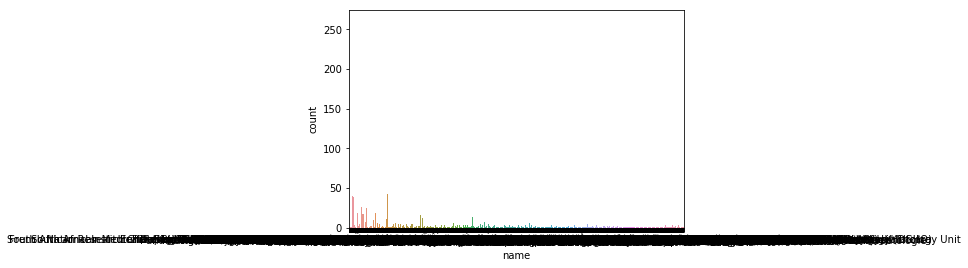

In [22]:
plt.show()

In [24]:
studies_c['name'].value_counts()[:10]

Assiut University                      261
National Taiwan University Hospital    252
National Cancer Institute (NCI)        238
Pfizer                                 157
GlaxoSmithKline                        117
Cairo University                       112
Merck Sharp & Dohme Corp.              110
Bristol-Myers Squibb                    97
University of Pittsburgh                97
Massachusetts General Hospital          93
Name: name, dtype: int64